## 0. 데이터 준비

In [1]:
# !pip install pandas mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [3]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [4]:
df.shape

(202772, 12)

In [5]:
df_age = df[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 8)

In [6]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_61662/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [7]:
df_v1 = df_age[df_age['품목대분류'] == '가공식품']
df_v1['품목대분류'].unique()

array(['가공식품'], dtype=object)

In [8]:
df_v1 = df_v1[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head(10)

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
1602,여자,10-14,식품 섭취에 의한 위험 및 위해,구토,"(부위)신체내부-소화계통(식도,위장,대장 등)",기타 - 시설목적공간
1603,여자,10-14,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 침실/방
1604,여자,25-29,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",기타 - 시설목적공간
1605,여자,35-39,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",기타 - 시설목적공간
1606,남자,65-69,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)기타 얼굴부위,주택 - 주방
1607,여자,20-24,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방
1608,남자,65-69,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실
1609,여자,35-39,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방
1610,여자,25-29,식품 섭취에 의한 위험 및 위해,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방
1611,남자,10-14,식품 섭취에 의한 위험 및 위해,두드러기,(부위)전신 손상,"기타 - 상세불명의 장소, 부대·부속시설"


## 1. 빈발항목 분석

In [9]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)머리카락,(부위)목,...,폭발,피부염 또는 피부발진,피부접촉에 의한 위험 및 위해,해당없음,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화상-화학물로 인한,화재
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

식품 섭취에 의한 위험 및 위해            29138
(부위)신체내부-소화계통(식도,위장,대장 등)    22540
소화기계통 장기손상 및 통증              18051
여자                           17632
남자                           13730
기타 - 시설목적공간                  12032
주택 - 주방                      10850
(부위)전신 손상                     4602
35-39                         3502
기타 - 상세불명의 장소, 부대·부속시설        3429
dtype: int64

In [12]:
df_encoded = df_encoded.drop(columns=['식품 섭취에 의한 위험 및 위해'])

#### [ 빈발항목 삭제 ]
- 다른 것에 비해 독보적으로 큰 값을 가진 **'식품 섭취에 의한 위험 및 위해'** 항목 삭제 후 진행
> - **예측가능하면서도 빈도 수가 독보적인 항목으로 인해 유의미한 규칙 도출 힘듦**
> - 빈발집합 생성 후 support 기준으로 삭제 시 연관규칙 생성 오류 존재
> - "식품 섭취에 의한 위험 및 위해"의 경우 대부분의 빈발집합에 존재 -> 없다고 해서 분석에 지장없음

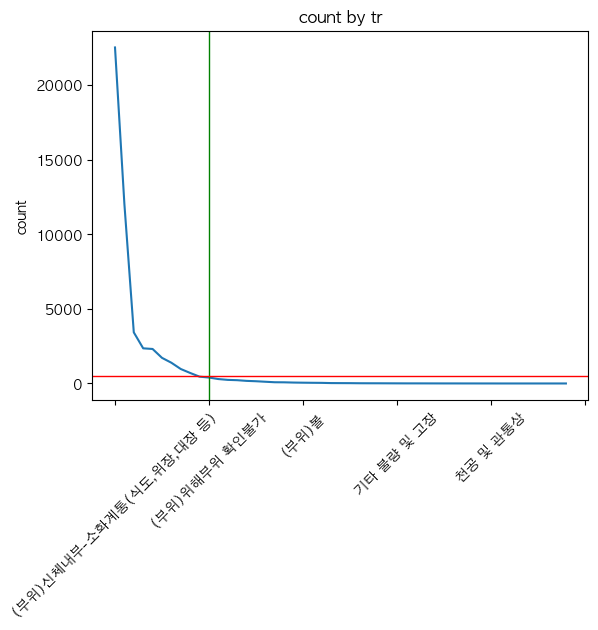

In [13]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
# plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()
# (17771, 457)

In [14]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
# frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
0,0.714761,"((부위)신체내부-소화계통(식도,위장,대장 등))"
3,0.572412,(소화기계통 장기손상 및 통증)
25,0.571968,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))"
1,0.559125,(여자)
6,0.435389,(남자)
11,0.410306,"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)"
2,0.381544,(기타 - 시설목적공간)
7,0.344062,(주택 - 주방 )
12,0.332139,"(소화기계통 장기손상 및 통증, 여자)"
13,0.331949,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), 여자)"


#### 빈발집합 분석 결과

- 여자(0.56) 대비 남자(0.44)의 support 값이 낮음. 신체적 혹은 사회적 특성으로 인한 수치로 생각됨

- (부위)신체내부-소화계통(식도,위장,대장 등)(0.71476), [증상]소화기계통 장기손상 및 통증(0.572412) 이 동시에 혹은 독립적으로 발생하는 경우가 많음. 충분히 예측가능한 수치로 보임.

- 특이하게도 [장소]기타 - 시설목적공간(0.381544)이 [장소]주택 - 주방(0.344062) 유사한 빈도 수를 가짐. 데이터에서 의미하는 시설목적공간에 "취사시설"이 포함될 것으로 예상됨

- (부위)신체내부-소화계통(식도,위장,대장 등) 외의 위해부위로 (부위)전신 손상(0.145933) 다소 빈번하게 발생하는 것 확인 가능
> - 가공식품의 "섭취"로 인한 사고가 많다는 점을 가정했을 때(삭제했던 항목), 섭취 후 발생하는 알러지 반응(두드러기, 부어오름 등)으로 여겨짐
> - [증상]두드러기(0.102299)의 빈도 수와 비슷한 것은 추측의 근거가 됨

In [15]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.714761,"((부위)신체내부-소화계통(식도,위장,대장 등))",1
1,0.559125,(여자),1
2,0.381544,(기타 - 시설목적공간),1
3,0.572412,(소화기계통 장기손상 및 통증),1
4,0.103472,(25-29),1


In [16]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2.sort_values(by='support', ascending=False)

,support,itemsets,length
25,0.571968,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",2
11,0.410306,"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",2
12,0.332139,"(소화기계통 장기손상 및 통증, 여자)",2
13,0.331949,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), 여자)",3
26,0.301126,"(남자, (부위)신체내부-소화계통(식도,위장,대장 등))",2
14,0.291771,"(기타 - 시설목적공간, (부위)신체내부-소화계통(식도,위장,대장 등))",2
30,0.250262,"(주택 - 주방 , (부위)신체내부-소화계통(식도,위장,대장 등))",2
16,0.243666,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증)",2
21,0.243412,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식...",3
27,0.238465,"(소화기계통 장기손상 및 통증, 남자)",2


#### 2건 이상의 항목을 갖는 빈발집합 분석 결과

- "(부위)신체내부-소화계통(식도,위장,대장 등), [증상]소화기계통 장기손상 및 통증, [장소]기타 - 시설목적공간" 여러 집합으로 동시에 발생하는 경우가 많음 : 대부분의 위해 사고에서의 위해부위, 위해증상, 위해장소 가 위 3개와 같다는 것 확인 가능

 
- 남성(7번)과 여성(10번)의 비율은 비슷한 정도로 함께 엮이나 여성이 조금 더 자주 등장함. 마찬가지로 신체적, 사회적 특성에서 기인한 현상으로 보임.

- 그 외 [장소]주택 - 주방도 빈번히 등장함.

--> 대부분 예측 가능한 결과라고 할 수 있음 

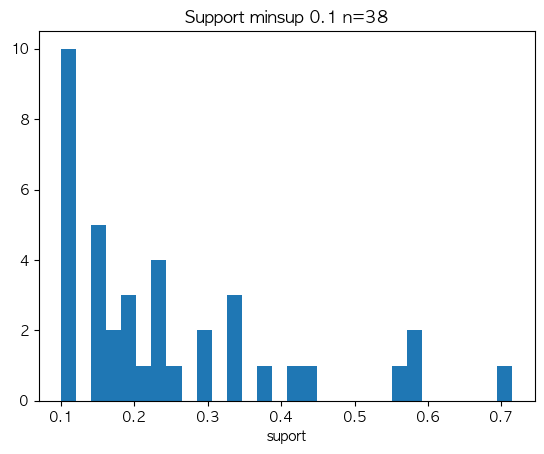

In [17]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsup {min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

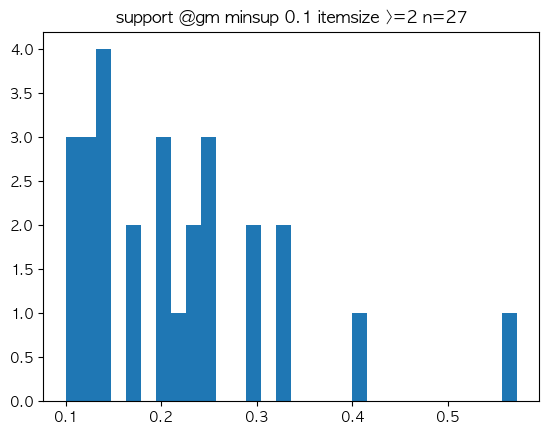

In [18]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'support @gm minsup {min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

In [19]:
#최소 지지도 0.1로 빈발 항목 집합을 분석한 결과에서 2개 이상의 항목을 포함하는 집합들 중 지지도가 높은 상위 5개 항목 집합
freq_its_2[freq_its_2.support >= 0.30].sort_values(by='support', ascending=False)

,support,itemsets,length
25,0.571968,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",2
11,0.410306,"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",2
12,0.332139,"(소화기계통 장기손상 및 통증, 여자)",2
13,0.331949,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), 여자)",3
26,0.301126,"(남자, (부위)신체내부-소화계통(식도,위장,대장 등))",2


## 2. 연관규칙 분석

In [20]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,"(소화기계통 장기손상 및 통증, 주택 - 주방 , 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.118123,0.714761,0.118059,0.999463,1.398317,0.033630,531.256937,0.323009
5,"(소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.332139,0.714761,0.331949,0.999427,1.398267,0.094549,497.931558,0.426479
29,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.572412,0.714761,0.571968,0.999224,1.397983,0.162830,367.774457,0.665789
40,"(소화기계통 장기손상 및 통증, 주택 - 주방 )","((부위)신체내부-소화계통(식도,위장,대장 등))",0.200729,0.714761,0.200571,0.999210,1.397963,0.057097,361.112098,0.356167
17,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.143016,0.714761,0.142889,0.999113,1.397827,0.040667,321.606548,0.332100
21,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.243666,0.714761,0.243412,0.998959,1.397612,0.069249,273.971698,0.376148
33,"(소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.238465,0.714761,0.238212,0.998936,1.397580,0.067766,268.124306,0.373558
26,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.100555,0.714761,0.100428,0.998739,1.397303,0.028555,226.122919,0.316124
18,"(기타 - 시설목적공간, (부위)신체내부-소화계통(식도,위장,대장 등), 여자)",(소화기계통 장기손상 및 통증),0.170794,0.572412,0.142889,0.836613,1.461559,0.045124,2.617035,0.380845
22,"(기타 - 시설목적공간, (부위)신체내부-소화계통(식도,위장,대장 등))",(소화기계통 장기손상 및 통증),0.291771,0.572412,0.243412,0.834257,1.457443,0.076399,2.579830,0.443171


#### 최소 신뢰도 0.5 이상의 연관 규칙 분석

- (부위)신체내부-소화계통(식도,위장,대장 등)가 후행절(결과절)로 나타나며 선행절(조건절)에 [증상]소화기계통 장기손상 및 통증이 포함되는 경우 conviction 값과 confidence 값이 매우 높음
> - 높은 conviction : 우연의 일치가 거의 배제됨. 선행절과 후행절 사이의 종속성이 강함
> - 높은 confidence : [증상]소화기계통 장기손상 및 통증(선행절)이 발생한 경우, (부위)신체내부-소화계통(식도,위장,대장 등)(후행절)일 확률이 높음.
> - 두 항목의 연관성은 기저 사실을 두고 판단했을 때 충분히 예측 가능한 결과임. 이에 규격 외로 높은 conv, conf 값을 가지는 본 항목들을 제외하고 분석하는 게 유의미할 것으로 보임. (당연한 사실 배제)

- 반대로 "(부위)신체내부-소화계통(식도,위장,대장 등)가 선행절(조건절)에 포함되며 후행절(결과절)이 [증상]소화기계통 장기손상 및 통증인 경우"
> - 마찬가지로 conf(평균적으로 0.83), conv(평균적으로 2.3) 값이 높은 편에 속하나 규격 외로 판단될 정도는 아님.
> - 통증이 동반되는 경우 소화계통 부위에서 그 통증이 발생하는 경우는 매우 높으나, 소화계통 부위에 피해가 발생했다고 해서 무조건적으로 통증이 동반되지는 않는 것으로 판단됨.

- 후행절(결과절)에 (부위)신체내부-소화계통(식도,위장,대장 등)나 [증상]소화기계통 장기손상 및 통증이 등장하는 경우가 conf 순으로 확인했을 때 큰 값을 차지한다고 결론지을 수 있음

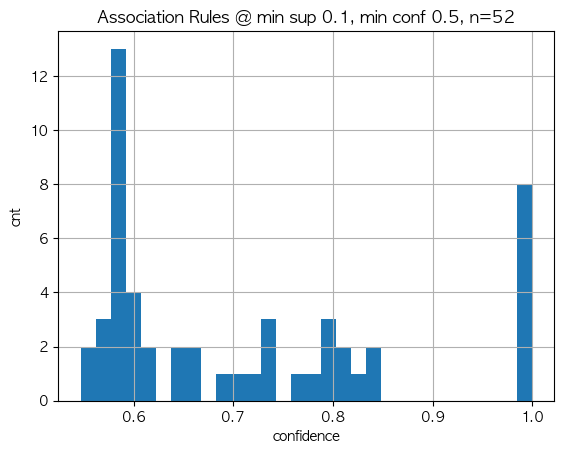

In [21]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

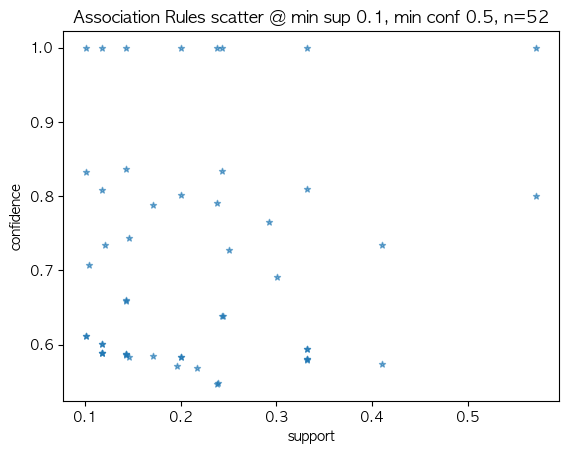

In [22]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

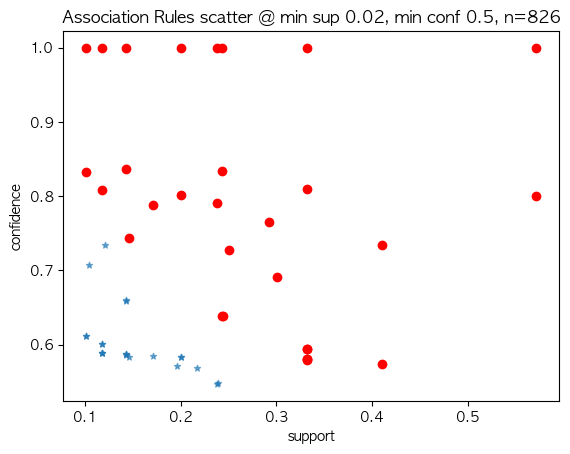

In [23]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 30개의 규칙 추출
top_30_rules = rules_conf.nlargest(30, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 30개의 규칙 강조 표시
plt.scatter(top_30_rules['support'], top_30_rules['confidence'], color='red')

plt.show()

In [24]:
top_30_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
29,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.572412,0.714761,0.571968,0.999224,1.397983,0.162830,367.774457,0.665789,1.571192
30,"((부위)신체내부-소화계통(식도,위장,대장 등))",(소화기계통 장기손상 및 통증),0.714761,0.572412,0.571968,0.800222,1.397983,0.162830,2.140316,0.998055,1.372189
5,"(소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.332139,0.714761,0.331949,0.999427,1.398267,0.094549,497.931558,0.426479,1.331376
21,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.243666,0.714761,0.243412,0.998959,1.397612,0.069249,273.971698,0.376148,1.242371
33,"(소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.238465,0.714761,0.238212,0.998936,1.397580,0.067766,268.124306,0.373558,1.237148
40,"(소화기계통 장기손상 및 통증, 주택 - 주방 )","((부위)신체내부-소화계통(식도,위장,대장 등))",0.200729,0.714761,0.200571,0.999210,1.397963,0.057097,361.112098,0.356167,1.199781
1,(여자),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.559125,0.714761,0.410306,0.733836,1.026687,0.010665,1.071666,0.058958,1.144142
17,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.143016,0.714761,0.142889,0.999113,1.397827,0.040667,321.606548,0.332100,1.142002
6,"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",(소화기계통 장기손상 및 통증),0.410306,0.572412,0.331949,0.809027,1.413366,0.097085,2.238999,0.495968,1.140976
48,"(소화기계통 장기손상 및 통증, 주택 - 주방 , 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.118123,0.714761,0.118059,0.999463,1.398317,0.033630,531.256937,0.323009,1.117522


#### [top10 구하기]
- 규격 외의 값을 가지는 행 제거
> - 당연하게 해석될 수 있는 행 제거를 통해 유의미한 규칙 도출하고자 함
> - 처음 빈발항목이었던 "[원인]식품 섭취~"를 제거한 것과 같은 이유
> - (인덱스 : 30, 6, 22, 34, 41, 18, 49, 27) : conf, conv 규격 외 값
>> - 필연적으로 발생한다라고 판단될만큼 큰 값을 가짐
>> - 굳이 분석할 필요 없음

- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - lift가 1에 근접하고, leverage가 0에 근접한 것이 동시에 만족한 경우 제거함
> - (인덱스 : 1, 4, 9, 31, 0, 36, 13, 3, 8, 2, 44, 11, 23)

#### [ 특이 규칙 분석 ]
[성별]남자 -> (부위)신체내부-소화계통(식도,위장,대장 등)
- sup:0.301126 conf:0.691624 lift:0.967629 leverage:-0.010074 conv:0.924971
> - leverage 의 값이 음수 값을 가짐.
> - 절대값으로 판단했을 때, lift와 lev값이 독립성이 강해 top9 분석에서는 제외함.

- 분석 & 추측
> - leverage == 종속 - 독립 으로 값이 클수록 종속적인 특성이 강하다고 판단 가능함. 이때 음수값이 나왔으므로 조건절과 결과절이 서로 음의 상관관계를 가진다고 판단 가능
> - 음의 상관관계도 함께 분석하면 좋으나 이 경우 절댓값이 작기 때문에 큰 영향을 주는 규칙으로 판단할 수 없음.

In [25]:
indices_to_drop = [30, 6, 22, 34, 41, 18, 49, 27, 1, 4, 9, 31, 0, 36, 13, 3, 8, 2, 44, 11, 23]
top_30_rules= top_30_rules.drop(indices_to_drop).reset_index(drop=True)

In [26]:
top_30_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.572412,0.714761,0.571968,0.999224,1.397983,0.162830,367.774457,0.665789,1.571192
1,"(소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.332139,0.714761,0.331949,0.999427,1.398267,0.094549,497.931558,0.426479,1.331376
2,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.243666,0.714761,0.243412,0.998959,1.397612,0.069249,273.971698,0.376148,1.242371
3,"(소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.238465,0.714761,0.238212,0.998936,1.397580,0.067766,268.124306,0.373558,1.237148
4,"(소화기계통 장기손상 및 통증, 주택 - 주방 )","((부위)신체내부-소화계통(식도,위장,대장 등))",0.200729,0.714761,0.200571,0.999210,1.397963,0.057097,361.112098,0.356167,1.199781
5,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.143016,0.714761,0.142889,0.999113,1.397827,0.040667,321.606548,0.332100,1.142002
6,"(소화기계통 장기손상 및 통증, 주택 - 주방 , 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.118123,0.714761,0.118059,0.999463,1.398317,0.033630,531.256937,0.323009,1.117522
7,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.100555,0.714761,0.100428,0.998739,1.397303,0.028555,226.122919,0.316124,1.099167
8,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",0.572412,0.410306,0.331949,0.579912,1.413366,0.097085,1.403741,0.683997,0.911861


#### [ 상위 30개 중 9개 뽑아냄 ]

##### 선행절, 후행절 특징
- 대부분 후행절(결과절)이 [증상]소화기계통 장기손상 및 통증으로 되어 있음
> - 가공식품의 경우 A라는 조건이 있을 때 결과적으로 소화기계통 장기손상이나 통증이 발생하는 경우가 많다는 것 확인 가능.
> - 빈발집합에서 봤던 것과 비슷하게 규칙성을 확인했을 때 [장소]주택 - 주방와 [장소]기타 - 시설목적공간이 균등하게 발견됨.
> - 성별은 거의 균등하게 집합에 포함되어 있음
- 선행절, 후행절 어디에 위치하든 [증상]소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등) 존재
> - 상식적으로 예측 가능한 결과.
> - 기존에 제외한 빈발 항목이었던 [원인]식품 섭취에 의한 위험 및 위해와 연관지어서 생각하면, 궁극적으로 (원인, 부위, 증상)이 하나로 집결됨을 알 수 있음

##### 지표별 특징
- support : 최소 10.0% 이상의 확률로 발생함
- confidence : 최소 58.9% 이상의 확률, 평균적으로 약 80% 이상의 조건부확률로 발생함. (A가 발생했을 때 B도 발생)
- lift, leverage : leverage가 lift에 비해 상대적으로 작은 값을 보이지만, lift값을 통해 일정 수준의 종속성을 판단 가능함 (평균적으로 1.4 이상)
- conviction : 최소 1.40, 평균적으로 약 2.2 정도의 값 가짐. 우연의 일치가 일정 수준 배제된 것으로 판단 가능

In [27]:
# 보고서용 정렬
top_30_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
6,"(소화기계통 장기손상 및 통증, 주택 - 주방 , 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.118123,0.714761,0.118059,0.999463,1.398317,0.033630,531.256937,0.323009,1.117522
1,"(소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.332139,0.714761,0.331949,0.999427,1.398267,0.094549,497.931558,0.426479,1.331376
0,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.572412,0.714761,0.571968,0.999224,1.397983,0.162830,367.774457,0.665789,1.571192
4,"(소화기계통 장기손상 및 통증, 주택 - 주방 )","((부위)신체내부-소화계통(식도,위장,대장 등))",0.200729,0.714761,0.200571,0.999210,1.397963,0.057097,361.112098,0.356167,1.199781
5,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.143016,0.714761,0.142889,0.999113,1.397827,0.040667,321.606548,0.332100,1.142002
2,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.243666,0.714761,0.243412,0.998959,1.397612,0.069249,273.971698,0.376148,1.242371
3,"(소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.238465,0.714761,0.238212,0.998936,1.397580,0.067766,268.124306,0.373558,1.237148
7,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.100555,0.714761,0.100428,0.998739,1.397303,0.028555,226.122919,0.316124,1.099167
8,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",0.572412,0.410306,0.331949,0.579912,1.413366,0.097085,1.403741,0.683997,0.911861


## 3. top 9 분포 확인

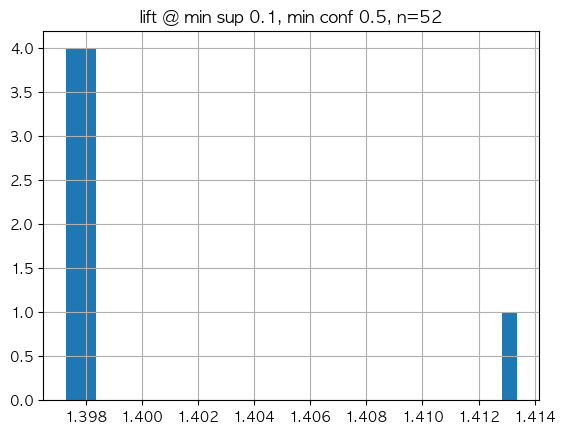

In [28]:
# 향상도 관찰
# 연관규칙의 향상도 분포
top_30_rules.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [29]:
filter = top_30_rules.lift.ge(1.4)
top_30_rules[filter].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
8,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",0.572412,0.410306,0.331949,0.579912,1.413366,0.097085,1.403741,0.683997,0.911861


##### Lift가 1.4 이상인 항목 분석

- ((부위)신체내부-소화계통(식도,위장,대장 등), 여자, 기타 - 시설목적공간) → (소화기계통 장기손상 및 통증): 소화계통 부위, 여자, 장소가 시설목적 공간인 경우 소화기계통 장기손상 및 통증이 발생하는 경우가 1.46으로 높은 종속성 보임. 선행절(조건절)이 후행절(결과절)에 영향 미침.

- ((부위)신체내부-소화계통(식도,위장,대장 등), 기타 - 시설목적공간) → (소화기계통 장기손상 및 통증): 소화계통 부위, 여자, 장소가 시설목적 공간인 경우 소화기계통 장기손상 및 통증이 발생하는 경우가 1.457으로 높은 종속성 보임. 선행절(조건절)이 후행절(결과절)에 영향 미침.

--> 보편적으로 **"(부위)신체내부-소화계통(식도,위장,대장 등), [장소]기타 - 시설목적공간인 경우가 함께 발생할 때, [증상]소화기계통 장기손상 및 통증이 발생한다."** 는 예측력 있는 연관규칙이라고 할 수 있음.

--> 더불어 대부분 conf 값도 높은 편에 속함

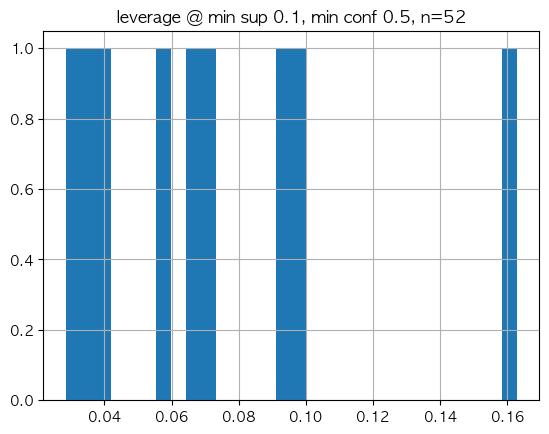

In [30]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
top_30_rules.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [31]:
filter = top_30_rules.leverage.ge(0.09)
top_30_rules[filter].sort_values(by='leverage', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.572412,0.714761,0.571968,0.999224,1.397983,0.162830,367.774457,0.665789,1.571192
8,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 여자)",0.572412,0.410306,0.331949,0.579912,1.413366,0.097085,1.403741,0.683997,0.911861
1,"(소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.332139,0.714761,0.331949,0.999427,1.398267,0.094549,497.931558,0.426479,1.331376


##### Leverage가 높은 항목 분석

- ((부위)신체내부-소화계통(식도,위장,대장 등)) → 소화기계통 장기손상 및 통증): lev 값은 0.16, sup 값은 57.2% conf 값은 80.0%로 sup, conf값이 높은 편에 속함.


--> 보편적으로 lev값은 sup, conf값이 값이 커야 큰 값을 가진다는 것 확인 가능(lift와의 차이)

--> 이에 따라 빈발집합의 빈도수가 높았던 것들로 구성된 것 확인 가능

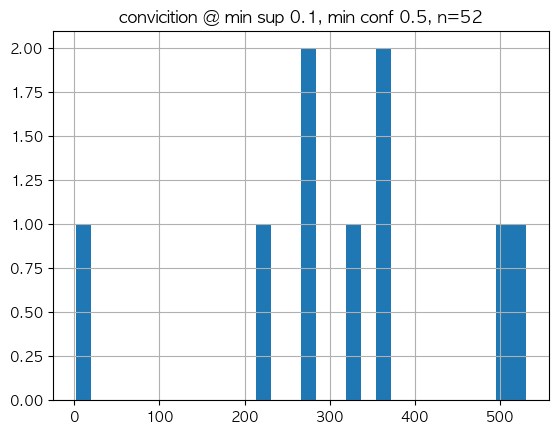

In [32]:
# 확신 관찰
# 연관규칙의 확신 분포
top_30_rules.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음

In [33]:
filter = top_30_rules.conviction.ge(2.2)
top_30_rules[filter].sort_values(by='conviction', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
6,"(소화기계통 장기손상 및 통증, 주택 - 주방 , 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.118123,0.714761,0.118059,0.999463,1.398317,0.033630,531.256937,0.323009,1.117522
1,"(소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.332139,0.714761,0.331949,0.999427,1.398267,0.094549,497.931558,0.426479,1.331376
0,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.572412,0.714761,0.571968,0.999224,1.397983,0.162830,367.774457,0.665789,1.571192
4,"(소화기계통 장기손상 및 통증, 주택 - 주방 )","((부위)신체내부-소화계통(식도,위장,대장 등))",0.200729,0.714761,0.200571,0.999210,1.397963,0.057097,361.112098,0.356167,1.199781
5,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 여자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.143016,0.714761,0.142889,0.999113,1.397827,0.040667,321.606548,0.332100,1.142002
2,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.243666,0.714761,0.243412,0.998959,1.397612,0.069249,273.971698,0.376148,1.242371
3,"(소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.238465,0.714761,0.238212,0.998936,1.397580,0.067766,268.124306,0.373558,1.237148
7,"(기타 - 시설목적공간, 소화기계통 장기손상 및 통증, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.100555,0.714761,0.100428,0.998739,1.397303,0.028555,226.122919,0.316124,1.099167


##### Conviction이 높은 항목 분석

모두 [증상]소화기계통 장기손상 및 통증이 후행절(결과절)에 위치한 것 확인 가능함.
- 부위, 성별, 장소 등에 여러 조합의 집합이 존재할 때, 증상이 발생하는 것이 필연적인 확률이 높다는 것을 시사함

#### [종합 분석 내용]

##### 주요 발견 사항

결과적으로 **[증상]소화기계통 장기손상 및 통증** 이 발생하는 경우가 빈번함.

- (부위)신체내부-소화계통(식도,위장,대장 등), [장소]주택 - 주방, 기타 - 시설목적공간 빈번.
- 이에 따라 가공식품으로 인한 위해 사건 시의 경위 **[증상]소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), [장소]주택 - 주방, 기타 - 시설목적공간 빈번** 로 특정할 수 있음
- 이때 **위 장소에서 부위에 피해가 발생했을 때(조건), 증상이 나타난다(결과)** 는 규칙이 우세함. 

> - 기존에 제외한 빈발 항목이었던 [원인]식품 섭취에 의한 위험 및 위해와 연관지어서 생각하면, 궁극적으로 (원인, 부위, 증상)이 하나로 집결된다고 예측할 수 있음.

## 4. top 9 시각화

In [34]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_30_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html


In [35]:
# 전체에 대해서

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in rules_conf.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules_전체데이터.html")  # 얘 이름 바꾸면서 저장하깅

association_rules_전체데이터.html
